In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
df = pd.read_csv("lc_loan.csv")
df = df.drop(columns='id')
df.shape

(933160, 36)

In [4]:
df.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,early_default,return
0,5000.0,5000.0,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.172631
1,2400.0,2400.0,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.252361
2,10000.0,10000.0,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.223189
3,5000.0,5000.0,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.126442
4,3000.0,3000.0,0.1864,109.43,E,E1,9 years,RENT,48000.0,Source Verified,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.313045


## Sample dataset

In [5]:
train, temp = train_test_split(df, test_size=0.3, random_state=42)
validation, test = train_test_split(temp, test_size=0.333, random_state=42)

print(train.shape)

(653212, 36)


In [6]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

## Exploration of Data

In [7]:
summary_stats = train.describe()
summary_stats[['loan_amnt','funded_amnt','int_rate','annual_inc','fico_range_low','return']]

,loan_amnt,funded_amnt,int_rate,annual_inc,fico_range_low,return
count,653212.000000,653212.000000,653212.000000,6.532120e+05,653212.000000,653212.000000
mean,12554.811187,12550.928489,0.119789,7.411166e+04,695.117121,0.065175
std,8037.890975,8036.893954,0.039930,6.892993e+04,31.326317,0.247611
min,500.000000,500.000000,0.053200,3.000000e+03,660.000000,-1.000000
25%,6425.000000,6400.000000,0.089000,4.400000e+04,670.000000,0.073493
50%,10000.000000,10000.000000,0.115300,6.200000e+04,690.000000,0.127636
75%,16225.000000,16200.000000,0.143300,9.000000e+04,710.000000,0.188747
max,40000.000000,40000.000000,0.309900,9.573072e+06,845.000000,0.581820


### Correlation Matrix

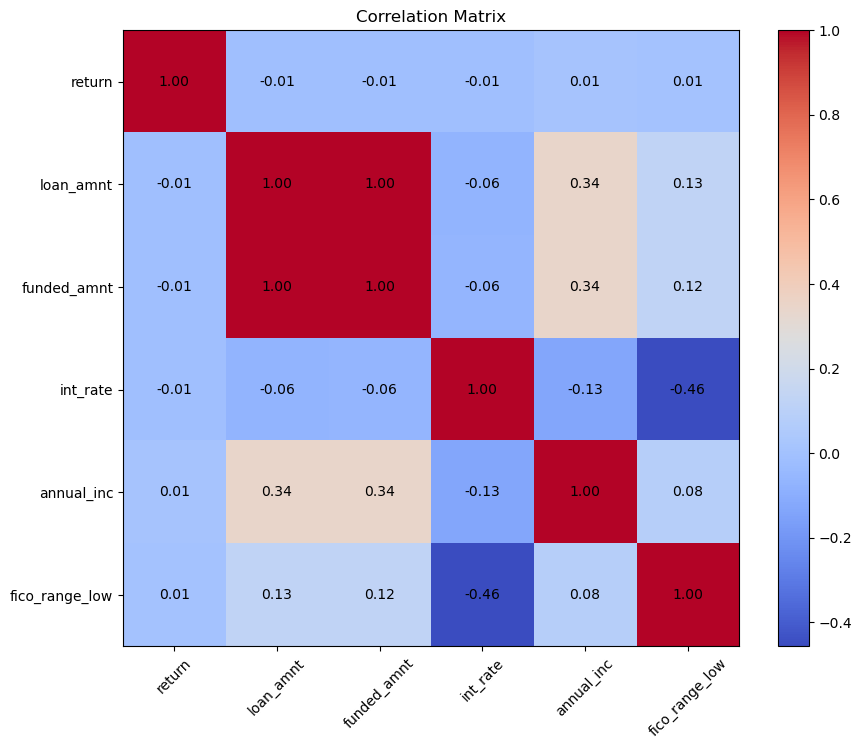

In [8]:
correlation_matrix = train[['return','loan_amnt','funded_amnt','int_rate','annual_inc','fico_range_low']].corr()

plt.figure(figsize=(10,8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

# Annotate the correlation coefficients on the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

### Time-series Plot

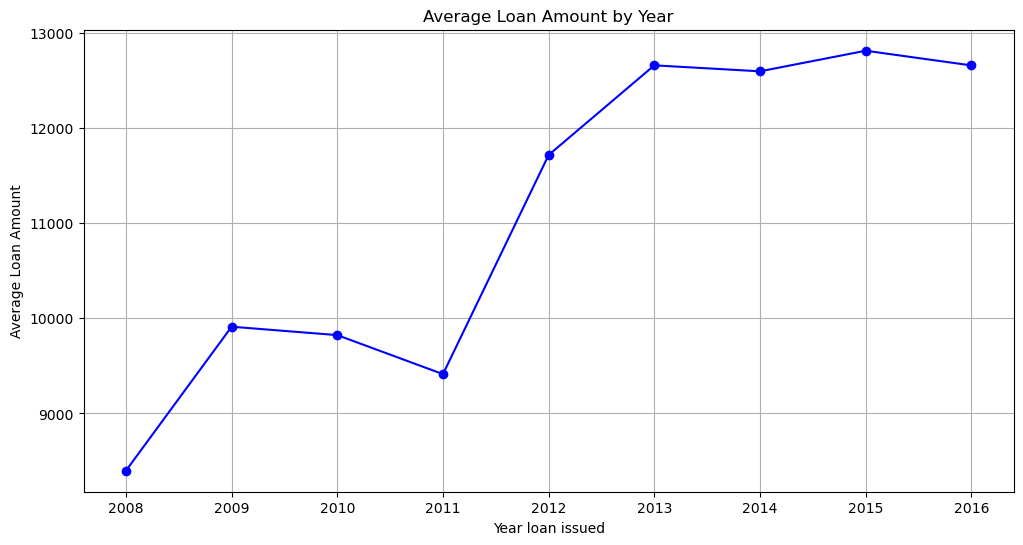

In [9]:
# Calculate the average SalePrice for each YearBuilt
average_price_per_year = train.groupby('year')['loan_amnt'].mean().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['year'], average_price_per_year['loan_amnt'], marker='o', color='blue')
plt.title('Average Loan Amount by Year')
plt.xlabel('Year loan issued')
plt.ylabel('Average Loan Amount')
plt.grid()
plt.show()

year
2008       47
2009      167
2010      219
2011      381
2012     1515
2013     2903
2014     5150
2015    10345
2016    13754
dtype: int64


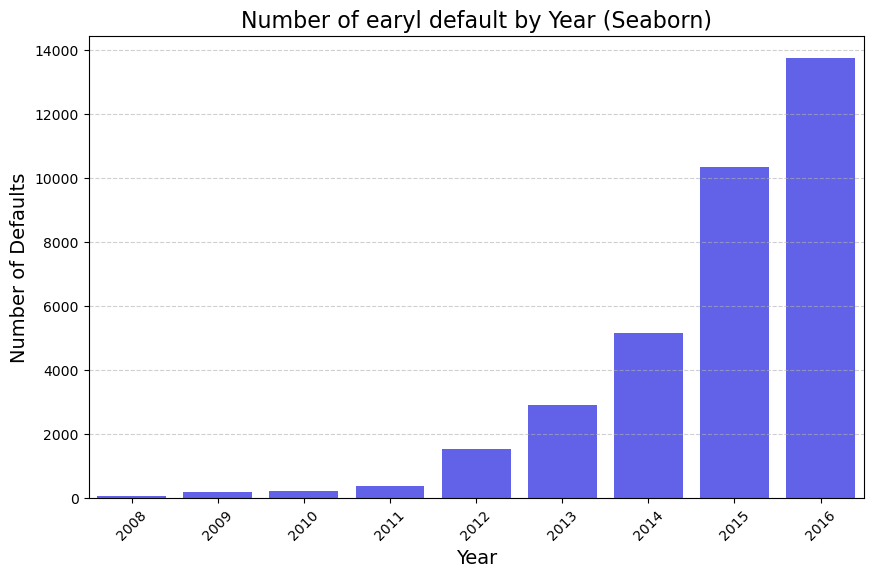

In [10]:
# where the loan status value was "Chareged Off"
number_of_default = train[train["early_default"] == 1].groupby("year").size()
print(number_of_default)

plt.figure(figsize=(10,6))
sns.barplot(x=number_of_default.index, y=number_of_default.values, color="blue", alpha=0.7)

# Adding titles and labels
plt.title("Number of earyl default by Year (Seaborn)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Defaults", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


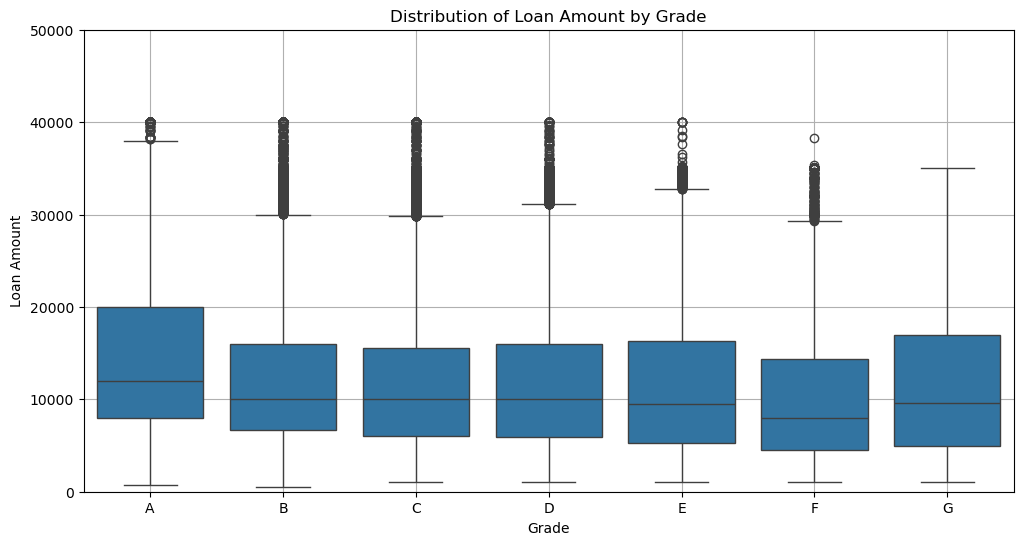

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='grade',y='loan_amnt',data=train)
plt.title('Distribution of Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.ylim(0, 50000)
plt.grid()
plt.show()

### Scatter Plots

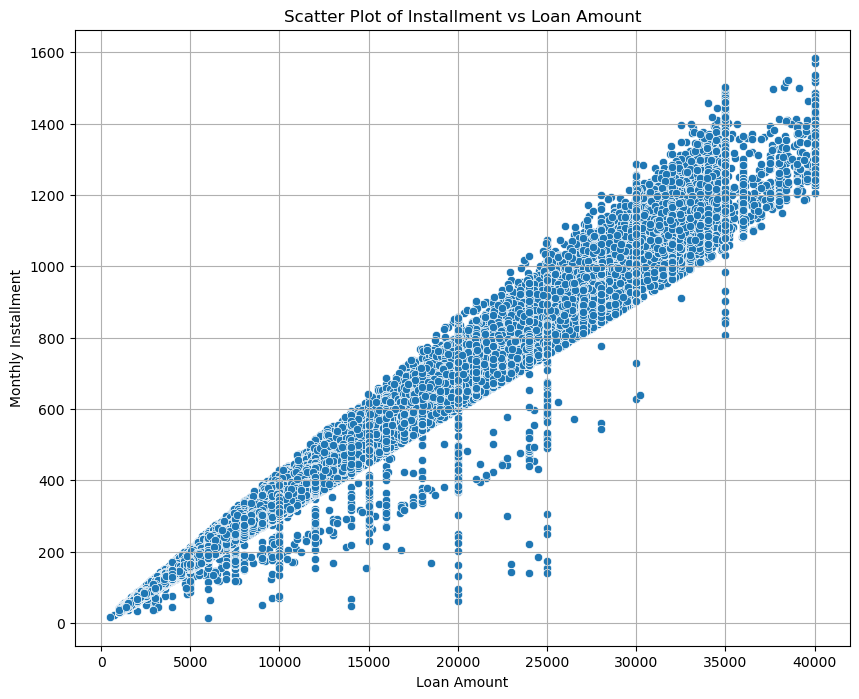

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train,x="loan_amnt",y="installment")
plt.title("Scatter Plot of Installment vs Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Monthly Installment")
plt.grid()
plt.show()


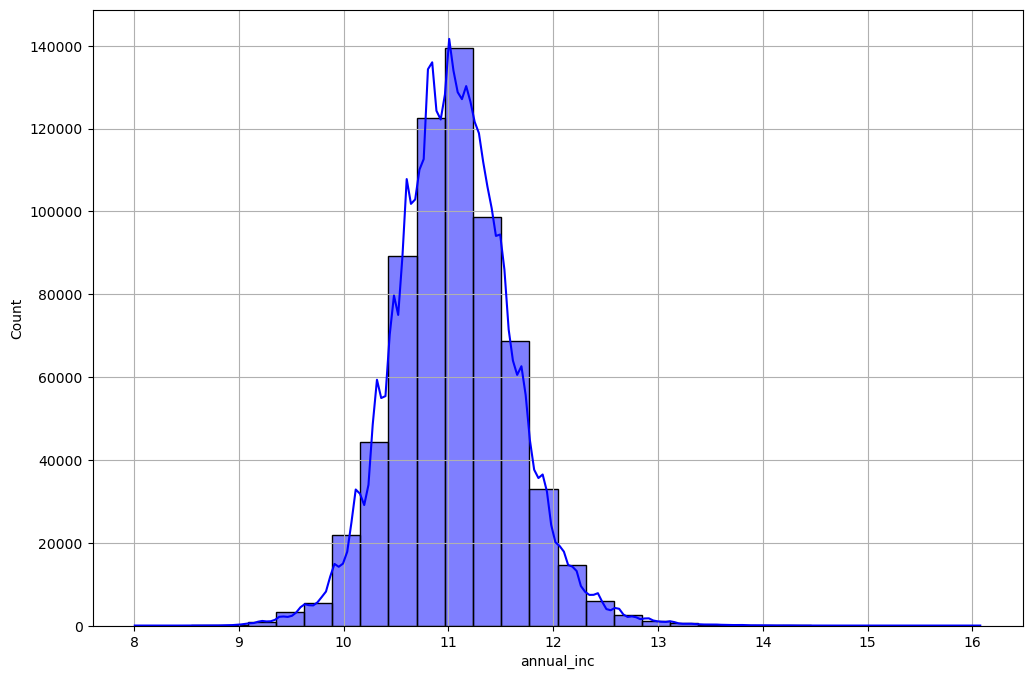

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(np.log1p(train['annual_inc']), kde=True, bins=30, color="blue", alpha=0.5)
# plt.scatter(train['loan_amnt'], train['return'], c="blue", marker='o')
plt.grid()
plt.show()

### Handling missing values

In [15]:
total = train.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]

total


mths_since_last_delinq    324826
emp_length                 40888
dtype: int64

In [16]:
train.loc[:, "emp_length"] = train.loc[:, "emp_length"].fillna(0)
validation.loc[:, "emp_length"] = validation.loc[:, "emp_length"].fillna(0)
test.loc[:, "emp_length"] = test.loc[:, "emp_length"].fillna(0)

In [17]:
# filling mnth_since_last_delinq
train.loc[:, "mths_since_last_delinq"] = train.loc[:, "mths_since_last_delinq"].fillna(0)
validation.loc[:, "mths_since_last_delinq"] = validation.loc[:, "mths_since_last_delinq"].fillna(0)
test.loc[:, "mths_since_last_delinq"] = test.loc[:, "mths_since_last_delinq"].fillna(0)

# Step 1: Define the delinquency-related features
delinq_features = [
    "mths_since_last_delinq", "delinq_2yrs", "acc_now_delinq",
    "chargeoff_within_12_mths", "delinq_amnt"
]

# Step 2: Create the binary feature (1 if any delinquency, 0 otherwise)
train["has_delinquency"] = train[delinq_features].apply(lambda row: 1 if (
    (row["mths_since_last_delinq"] > 0) |  # Has a recorded delinquency
    (row["delinq_2yrs"] > 0) |  # Had a delinquency in the last 2 years
    (row["acc_now_delinq"] > 0) |  # Currently delinquent
    (row["chargeoff_within_12_mths"] > 0) |  # Charged off within last 12 months
    (row["delinq_amnt"] > 0)  # Has past-due amount
) else 0, axis=1)
validation["has_delinquency"] = validation[delinq_features].apply(lambda row: 1 if (
    (row["mths_since_last_delinq"] > 0) |  # Has a recorded delinquency
    (row["delinq_2yrs"] > 0) |  # Had a delinquency in the last 2 years
    (row["acc_now_delinq"] > 0) |  # Currently delinquent
    (row["chargeoff_within_12_mths"] > 0) |  # Charged off within last 12 months
    (row["delinq_amnt"] > 0)  # Has past-due amount
) else 0, axis=1)
test["has_delinquency"] = test[delinq_features].apply(lambda row: 1 if (
    (row["mths_since_last_delinq"] > 0) |  # Has a recorded delinquency
    (row["delinq_2yrs"] > 0) |  # Had a delinquency in the last 2 years
    (row["acc_now_delinq"] > 0) |  # Currently delinquent
    (row["chargeoff_within_12_mths"] > 0) |  # Charged off within last 12 months
    (row["delinq_amnt"] > 0)  # Has past-due amount
) else 0, axis=1)


In [18]:
total = train.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]

total

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [19]:
# Identify all non-numeric features
non_numeric_features = train.select_dtypes(include=["object"]).columns.tolist()

print("Non-Numeric Features:", non_numeric_features)

Non-Numeric Features: ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line']


In [20]:
train = train.replace({
    "grade": {"NA": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7},
    "sub_grade": {
        "A1": 1, "A2": 2, "A3": 3, "A4": 4, "A5": 5,
        "B1": 6, "B2": 7, "B3": 8, "B4": 9, "B5": 10,
        "C1": 11, "C2": 12, "C3": 13, "C4": 14, "C5": 15,
        "D1": 16, "D2": 17, "D3": 18, "D4": 19, "D5": 20,
        "E1": 21, "E2": 22, "E3": 23, "E4": 24, "E5": 25,
        "F1": 26, "F2": 27, "F3": 28, "F4": 29, "F5": 30,
        "G1": 31, "G2": 32, "G3": 33, "G4": 34, "G5": 35
    },
    "emp_length": {
        "< 1 year": 1, "1 year": 1, "2 years": 2, "3 years": 3,
        "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7,
        "8 years": 8, "9 years": 9, "10+ years": 10
    },
    "verification_status" :{
        "Not Verified" : 0, "Verified" : 1, "Source Verified" : 1
    },
    "loan_status" : {
        "Fully Paid": 0, "Charged Off" : 1
    }

}).infer_objects()
validation = validation.replace({
    "grade": {"NA": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7},
    "sub_grade": {
        "A1": 1, "A2": 2, "A3": 3, "A4": 4, "A5": 5,
        "B1": 6, "B2": 7, "B3": 8, "B4": 9, "B5": 10,
        "C1": 11, "C2": 12, "C3": 13, "C4": 14, "C5": 15,
        "D1": 16, "D2": 17, "D3": 18, "D4": 19, "D5": 20,
        "E1": 21, "E2": 22, "E3": 23, "E4": 24, "E5": 25,
        "F1": 26, "F2": 27, "F3": 28, "F4": 29, "F5": 30,
        "G1": 31, "G2": 32, "G3": 33, "G4": 34, "G5": 35
    },
    "emp_length": {
        "< 1 year": 1, "1 year": 1, "2 years": 2, "3 years": 3,
        "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7,
        "8 years": 8, "9 years": 9, "10+ years": 10
    },
    "verification_status" :{
        "Not Verified" : 0, "Verified" : 1, "Source Verified" : 1
    },
    "loan_status" : {
        "Fully Paid": 0, "Charged Off" : 1
    }
}).infer_objects()
test = test.replace({
    "grade": {"NA": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7},
    "sub_grade": {
        "A1": 1, "A2": 2, "A3": 3, "A4": 4, "A5": 5,
        "B1": 6, "B2": 7, "B3": 8, "B4": 9, "B5": 10,
        "C1": 11, "C2": 12, "C3": 13, "C4": 14, "C5": 15,
        "D1": 16, "D2": 17, "D3": 18, "D4": 19, "D5": 20,
        "E1": 21, "E2": 22, "E3": 23, "E4": 24, "E5": 25,
        "F1": 26, "F2": 27, "F3": 28, "F4": 29, "F5": 30,
        "G1": 31, "G2": 32, "G3": 33, "G4": 34, "G5": 35
    },
    "emp_length": {
        "< 1 year": 1, "1 year": 1, "2 years": 2, "3 years": 3,
        "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7,
        "8 years": 8, "9 years": 9, "10+ years": 10
    },
    "verification_status" :{
        "Not Verified" : 0, "Verified" : 1, "Source Verified" : 1
    },
    "loan_status" : {
        "Fully Paid": 0, "Charged Off" : 1
    }
}).infer_objects()

C:\Users\sshresth2\AppData\Local\Temp\ipykernel_29764\152407186.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({
C:\Users\sshresth2\AppData\Local\Temp\ipykernel_29764\152407186.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation = validation.replace({
C:\Users\sshresth2\AppData\Local\Temp\ipykernel_29764\152407186.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

In [21]:
# Create binary features for 'MORTGAGE', 'RENT', and 'OWN'
train["home_ownership_mortgage"] = (train["home_ownership"] == "MORTGAGE").astype(int)
train["home_ownership_rent"] = (train["home_ownership"] == "RENT").astype(int)
train["home_ownership_own"] = (train["home_ownership"] == "OWN").astype(int)

validation["home_ownership_mortgage"] = (validation["home_ownership"] == "MORTGAGE").astype(int)
validation["home_ownership_rent"] = (validation["home_ownership"] == "RENT").astype(int)
validation["home_ownership_own"] = (validation["home_ownership"] == "OWN").astype(int)

test["home_ownership_mortgage"] = (test["home_ownership"] == "MORTGAGE").astype(int)
test["home_ownership_rent"] = (test["home_ownership"] == "RENT").astype(int)
test["home_ownership_own"] = (test["home_ownership"] == "OWN").astype(int)

In [22]:
train["issue_d"] = pd.to_datetime(train["issue_d"], format="%b-%Y")
train["issue_d_year"] = train["issue_d"].dt.year
train["issue_d_month"] = train["issue_d"].dt.month

validation["issue_d"] = pd.to_datetime(validation["issue_d"], format="%b-%Y")
validation["issue_d_year"] = validation["issue_d"].dt.year
validation["issue_d_month"] = validation["issue_d"].dt.month

test["issue_d"] = pd.to_datetime(test["issue_d"], format="%b-%Y")
test["issue_d_year"] = test["issue_d"].dt.year
test["issue_d_month"] = test["issue_d"].dt.month

In [23]:
train["earliest_cr_line"] = pd.to_datetime(train["earliest_cr_line"], format="%b-%Y")
train["earliest_cr_line_year"] = train["earliest_cr_line"].dt.year
train["earliest_cr_line_month"] = train["earliest_cr_line"].dt.month

validation["earliest_cr_line"] = pd.to_datetime(validation["earliest_cr_line"], format="%b-%Y")
validation["earliest_cr_line_year"] = validation["earliest_cr_line"].dt.year
validation["earliest_cr_line_month"] = validation["earliest_cr_line"].dt.month

test["earliest_cr_line"] = pd.to_datetime(test["earliest_cr_line"], format="%b-%Y")
test["earliest_cr_line_year"] = test["earliest_cr_line"].dt.year
test["earliest_cr_line_month"] = test["earliest_cr_line"].dt.month

In [24]:
train.drop(columns=["issue_d"], inplace=True)
train.drop(columns=["earliest_cr_line"], inplace=True)

validation.drop(columns=["issue_d"], inplace=True)
validation.drop(columns=["earliest_cr_line"], inplace=True)

test.drop(columns=["issue_d"], inplace=True)
test.drop(columns=["earliest_cr_line"], inplace=True)

In [25]:
train.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,early_default,return,has_delinquency,home_ownership_mortgage,home_ownership_rent,home_ownership_own,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
294287,24000.0,24000.0,0.0790,750.97,1,4,1,MORTGAGE,150000.0,0,...,0,0.114758,1,1,0,0,2014,4,1985,10
664837,1800.0,1800.0,0.1075,58.72,2,9,10,RENT,108000.0,0,...,0,0.174127,0,0,1,0,2016,2,1986,2
659935,20000.0,20000.0,0.1075,652.41,2,9,2,MORTGAGE,145000.0,1,...,0,0.101257,0,1,0,0,2016,3,1995,5
336162,13000.0,13000.0,0.0532,391.50,1,1,4,RENT,86000.0,0,...,0,0.076633,0,0,1,0,2015,12,1998,10
885808,6400.0,6400.0,0.1349,217.16,3,12,10,RENT,85000.0,1,...,1,-0.865025,1,0,1,0,2016,11,1999,7


In [26]:
train["zip_code"] = train["zip_code"].str[:3]
train["zip_code"] = train["zip_code"].astype(int)

validation["zip_code"] = validation["zip_code"].str[:3]
validation["zip_code"] = validation["zip_code"].astype(int)

test["zip_code"] = test["zip_code"].str[:3]
test["zip_code"] = test["zip_code"].astype(int)


In [27]:
print(train.dtypes)


loan_amnt                     float64
funded_amnt                   float64
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status             int64
loan_status                     int64
purpose                        object
zip_code                        int32
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
collections_12_mths_ex_med    float64
acc_now_deli

In [28]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return',
       'has_delinquency', 'home_ownership_mortgage', 'home_ownership_rent',
       'home_ownership_own', 'issue_d_year', 'issue_d_month',
       'earliest_cr_line_year', 'earliest_cr_line_month'],
      dtype='object')

In [29]:
#loan to income ratio
train["loan_income_ratio"] = train["loan_amnt"]/train["annual_inc"]
train["interest_rate_impact"] = train["int_rate"] * train["loan_amnt"]

validation["loan_income_ratio"] = validation["loan_amnt"]/validation["annual_inc"]
validation["interest_rate_impact"] = validation["int_rate"] * validation["loan_amnt"]

test["loan_income_ratio"] = test["loan_amnt"]/test["annual_inc"]
test["interest_rate_impact"] = test["int_rate"] * test["loan_amnt"]


train["int_rate_2"] = train["int_rate"] ** 2
validation["int_rate_2"] = validation["int_rate"] ** 2
test["int_rate_2"] = test["int_rate"] ** 2

In [30]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include=["object"]).columns
numerical_features = train.select_dtypes(exclude=["object"]).columns
numerical_features = numerical_features.drop(["return", "early_default"])
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

# separate the numerical and categorical features
X_train = train[numerical_features]
X_validation = validation[numerical_features]
X_test = test[numerical_features]

# isolate the target feature
y_train = train[["return"]]
y_validation = validation[["return"]]
y_test = test[["return"]]

Numerical features : 40
Categorical features : 3


In [31]:
X_train.dtypes

loan_amnt                     float64
funded_amnt                   float64
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
annual_inc                    float64
verification_status             int64
loan_status                     int64
zip_code                        int32
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
chargeoff_within_12_mths      float64
delinq_amnt                   float64
pub_rec_bank

In [32]:

print("New number of features : " + str(X_train.shape[1]))

# Print the size of the samples
print("X_train : " + str(X_train.shape))
print("X_validation : " + str(X_validation.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_validation : " + str(y_validation.shape))
print("y_test : " + str(y_test.shape))

New number of features : 40
X_train : (653212, 40)
X_validation : (186725, 40)
X_test : (93223, 40)
y_train : (653212, 1)
y_validation : (186725, 1)
y_test : (93223, 1)


In [33]:
# Identify all non-numeric features
non_numeric_features = train.select_dtypes(include=["object"]).columns.tolist()

print("Non-Numeric Features:", non_numeric_features)

Non-Numeric Features: ['home_ownership', 'purpose', 'addr_state']


TODO encode purpose

In [34]:
train["purpose"].unique()

array(['credit_card', 'medical', 'debt_consolidation', 'car', 'other',
       'home_improvement', 'vacation', 'major_purchase', 'house',
       'small_business', 'moving', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

In [35]:
# Standardize numerical features
stdSc = StandardScaler()
X_train[numerical_features] = stdSc.fit_transform(X_train[numerical_features].astype(float))
X_validation[numerical_features] = stdSc.transform(X_validation[numerical_features].astype(float))
X_test[numerical_features] = stdSc.transform(X_test[numerical_features].astype(float))

C:\Users\sshresth2\AppData\Local\Temp\ipykernel_29764\441888902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = stdSc.fit_transform(X_train[numerical_features].astype(float))
C:\Users\sshresth2\AppData\Local\Temp\ipykernel_29764\441888902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation[numerical_features] = stdSc.transform(X_validation[numerical_features].astype(float))
C:\Users\sshresth2\AppData\Local\Temp\ipykernel_29764\441888902.py:5: SettingWithCopyWar

## Model and Assessment

In [36]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Add the constant term
X_train = sm.add_constant(X_train)
X_validation = sm.add_constant(X_validation, has_constant='add')
X_test = sm.add_constant(X_test, has_constant='add')


In [37]:
def calculate_r2(y_true, y_pred, in_sample=True, benchmark=None):
    if in_sample:
        return 1 - (np.sum((y_true - y_pred) ** 2) / 
                    np.sum((y_true - np.mean(y_true)) ** 2))
    else:
        if benchmark is None:
            raise ValueError("Benchmark must be provided for out-of-sample R-squared calculation.")
        return 1 - (np.sum((y_true - y_pred) ** 2) / 
                    np.sum((y_true - benchmark) ** 2))

In [38]:
X_train.head()
X_train.columns

Index(['const', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'loan_status', 'zip_code', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'has_delinquency', 'home_ownership_mortgage',
       'home_ownership_rent', 'home_ownership_own', 'issue_d_year',
       'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month',
       'loan_income_ratio', 'interest_rate_impact', 'int_rate_2'],
      dtype='object')

In [39]:
# Linear Regression
lr_model = sm.OLS(y_train, X_train).fit()

In [40]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 return   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 5.073e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:43:55   Log-Likelihood:             4.4010e+05
No. Observations:              653212   AIC:                        -8.801e+05
Df Residuals:                  653172   BIC:                        -8.797e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0652      0.000    427.013      0.000       0.065       0.065
loan_amnt                     -0.0232      0.008     -2.857      0.004      -0.039      -0.007
funded_amnt                    0.1316      0.026      5.063      0.000       0.081       0.182
int_rate                       0.0675      0.001     54.746      0.000       0.065       0.070
installment                   -0.1253      0.026     -4.854      0.000      -0.176      -0.075
grade                          0.0006      0.001      0.997      0.319      -0.001       0.002
sub_grade                     -0.0053      0.001     -5.445      0.000      -0.007      -0.003
emp_length                     0.0010      0.000      6.143      0.000       0.001       0.001
annual_inc                     0.0005      0.000      2.741      0.006       0.000       0.001
verification_status           -0.0004      0.000     -2.468      0.014      -0.001    -8.2e-05
loan_status                   -0.2186      0.000  -1393.839      0.000      -0.219      -0.218
zip_code                      -0.0022      0.000    -14.482      0.000      -0.003      -0.002
dti                            0.0008      0.000      4.488      0.000       0.000       0.001
delinq_2yrs                    0.0007      0.000      3.590      0.000       0.000       0.001
fico_range_low                -0.3035      0.441     -0.688      0.492      -1.168       0.561
fico_range_high                0.2999      0.441      0.680      0.497      -0.565       1.165
inq_last_6mths                -0.0021      0.000    -12.980      0.000      -0.002      -0.002
mths_since_last_delinq        -0.0011      0.000     -3.917      0.000      -0.002      -0.001
open_acc                       0.0080      0.000     34.707      0.000       0.008       0.008
pub_rec                        0.0030      0.000      6.940      0.000       0.002       0.004
revol_bal                     -0.0010      0.000     -5.295      0.000      -0.001      -0.001
revol_util                     0.0061      0.000     30.496      0.000       0.006       0.007
total_acc                     -0.0100      0.000    -42.316      0.000      -0.010      -0.010
collections_12_mths_ex_med     0.0005      0.000      2.975      0.003       0.000       0.001
acc_now_delinq                 0.0002      0.000      1.512      0.131   -7.05e-05       0.001
chargeoff_within_12_mths   -7.598e-05      0.000     -0.491      0.623      -0.000       0.000
delinq_amnt                   -0.0003      0.000     -1.983      0.047      -0.001   -3.59e-06
pub_rec_bankruptcies          -0.0019      0.000     -6.381      0.000      -0.002      -0.001
tax_liens                     -0.0006      0.000     -1.795      0.073      -0.001    5.49e-05
year                          -0.0028   8.7

In [43]:

y_pred_lr_train = lr_model.predict(X_train)



In [63]:
y_train_np = y_train.to_numpy().ravel()
print(f"y_train_np shape: {y_train_np.shape}")  
print(f"y_pred_lr_train shape: {y_pred_lr_train.shape}")


y_train_np shape: (653212,)
y_pred_lr_train shape: (653212,)


In [64]:

r2_linear_train = calculate_r2(y_train_np, y_pred_lr_train, in_sample=True)  # Calculate in-sample R-squared using the function


In [69]:
y_validation_np = y_validation.to_numpy().ravel()
y_validation_np.shape

(186725,)

In [70]:
  # Fit the model directly
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_validation = lr_model.predict(X_validation)
r2_linear_train = calculate_r2(y_train_np, y_pred_lr_train, in_sample=True)  # Calculate in-sample R-squared using the function
r2_linear_validation = calculate_r2(y_validation_np, y_pred_lr_validation, in_sample=False, benchmark=np.mean(y_train))  # Calculate out-of-sample R-squared using the function

print(f"Linear Regression - R-squared (Train): {r2_linear_train}, R-squared (Validation): {r2_linear_validation}")

Linear Regression - R-squared (Train): 0.7518165784673915, R-squared (Validation): 0.7527605138882273


In [75]:
y_pred_lr_test = lr_model.predict(X_test)
y_test_np = y_test.to_numpy().ravel()
r2_linear_test = calculate_r2(y_test_np, y_pred_lr_test, in_sample=False, benchmark=np.mean(y_train))  # Calculate out-of-sample R-squared using the function


In [76]:
r2_linear_test

0.7536089821150548

### Ridge Regression

In [86]:
alphas = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
results = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # print(f"y_train_np shape: {y_train_np.shape}")  
    # print(f"y_validation_np shape: {y_validation_np.shape}")

    y_pred_ridge_train = ridge_model.predict(X_train).ravel()
    y_pred_ridge_validation = ridge_model.predict(X_validation).ravel()
    # print(f"y_pred_ridge_train shape: {y_pred_ridge_train.shape}")  
    # print(f"y_pred_ridge_validation shape: {y_pred_ridge_validation.shape}")

    r2_ridge_train = calculate_r2(y_train_np, y_pred_ridge_train, in_sample=True)
    r2_ridge_validation = calculate_r2(y_validation_np, y_pred_ridge_validation, in_sample=False, benchmark=np.mean(y_train_np))

    results.append({'alpha': alpha, 'R2 Train': r2_ridge_train, 'R2 Validation': r2_ridge_validation})

# Create a DataFrame to store the results
ridge_results_df = pd.DataFrame(results)
ridge_results_df = ridge_results_df.sort_values(by='R2 Validation', ascending=False)  # Rank by R2 Validation
print(ridge_results_df)

   alpha  R2 Train  R2 Validation
5  0.005  0.751817       0.752761
6  0.001  0.751817       0.752761
4  0.010  0.751817       0.752761
3  0.050  0.751817       0.752760
2  0.100  0.751816       0.752760
1  0.500  0.751816       0.752760
0  1.000  0.751816       0.752760


## Testing data

In [87]:
real_test = pd.read_csv("lc_loan_test.csv")
real_test.head()

,id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
0,1,10000.0,10000.0,0.0749,311.02,A,A4,3 years,RENT,50000.0,...,8333.0,0.192,19.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
1,2,13000.0,13000.0,0.1144,428.32,B,B4,10+ years,RENT,54500.0,...,12514.0,0.335,23.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
2,3,3025.0,3025.0,0.0699,93.39,A,A2,10+ years,MORTGAGE,83000.0,...,45915.0,0.673,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
3,4,9000.0,9000.0,0.1139,296.32,B,B3,10+ years,MORTGAGE,60000.0,...,20779.0,0.300,25.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
4,5,12000.0,12000.0,0.0699,370.48,A,A2,10+ years,MORTGAGE,56000.0,...,6665.0,0.240,28.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
